In [1]:
import data_generator as dg
import matplotlib.pyplot as plt
import numpy as np
x,c=dg.binary_budget(T=104)

[1.         1.06666667 1.13333333]


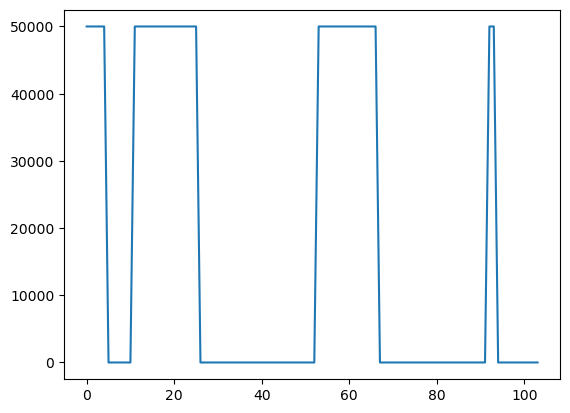

In [2]:
plt.plot(x)

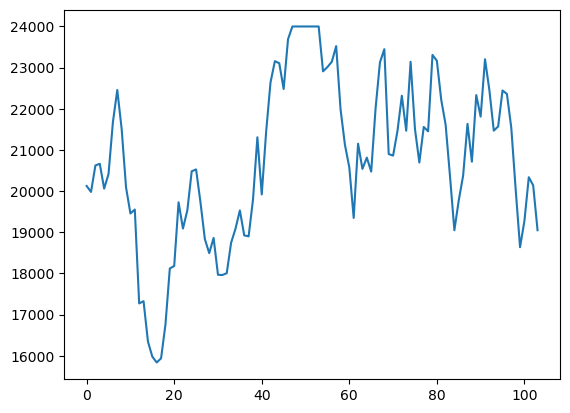

In [3]:
y=dg.mean_reverting_budget(phi=0.9, cap=24000)

plt.plot(y)
plt.show()

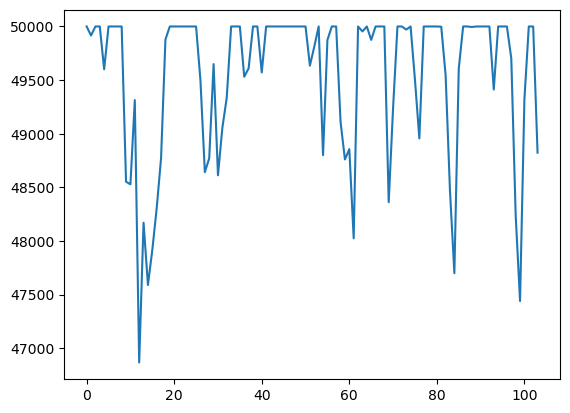

In [4]:
z=dg.mean_reverting_budget(mu=50000,phi=0.5,cap=50000,sigma=1200)

plt.plot(z)
plt.show()

In [5]:
sales=dg.generate_sales_data(x,y,z,betas=[0.005,0.15,0.14], intercept=3)

In [18]:
X = np.column_stack([bud,z])
betas=[0.1,0.2]
betas=np.asarray(betas,float)
print(X)
print(betas)
np.prod((1+X +0.00001) ** betas, axis=1)

[[50000 50000]
 [50000 49916]
 [50000 50000]
 [50000 50000]
 [50000 49601]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 48552]
 [    0 48528]
 [50000 49313]
 [50000 46866]
 [50000 48170]
 [50000 47589]
 [50000 47915]
 [50000 48304]
 [50000 48772]
 [50000 49879]
 [50000 50000]
 [50000 50000]
 [50000 50000]
 [50000 50000]
 [50000 50000]
 [50000 50000]
 [50000 50000]
 [    0 49495]
 [    0 48641]
 [    0 48771]
 [    0 49649]
 [    0 48612]
 [    0 49054]
 [    0 49335]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 49531]
 [    0 49609]
 [    0 50000]
 [    0 50000]
 [    0 49571]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 50000]
 [    0 49635]
 [    0 49812]
 [50000 50000]
 [50000 48800]
 [50000 49874]
 [50000 50000]
 [50000 50000]
 [50000 49109]
 [50000 48760]
 [50000 48856]
 [50000 48024]
 [50000 50000]
 [50000 49954]
 [50000 50000]
 [50000 49875]
 [50000 50

array([25.68583019, 25.67719412, 25.68583019, 25.68583019, 25.64470494,
        8.70554916,  8.70554916,  8.70554916,  8.70554916,  8.6545332 ,
        8.65367743, 25.61485579, 25.35544868, 25.49499913, 25.43320021,
       25.46794951, 25.50916755, 25.5584059 , 25.67338644, 25.68583019,
       25.68583019, 25.68583019, 25.68583019, 25.68583019, 25.68583019,
       25.68583019,  8.68789283,  8.65770371,  8.66232646,  8.69329235,
        8.65667113,  8.67235586,  8.68226868,  8.70554916,  8.70554916,
        8.70554916,  8.68915626,  8.69189117,  8.70554916,  8.70554916,
        8.6905592 ,  8.70554916,  8.70554916,  8.70554916,  8.70554916,
        8.70554916,  8.70554916,  8.70554916,  8.70554916,  8.70554916,
        8.70554916,  8.69280204,  8.69899285, 25.68583019, 25.56133978,
       25.67287172, 25.68583019, 25.68583019, 25.59362815, 25.55714811,
       25.56720351, 25.47952596, 25.68583019, 25.68110235, 25.68583019,
       25.67297467, 25.68583019,  8.70554916,  8.70554916,  8.64

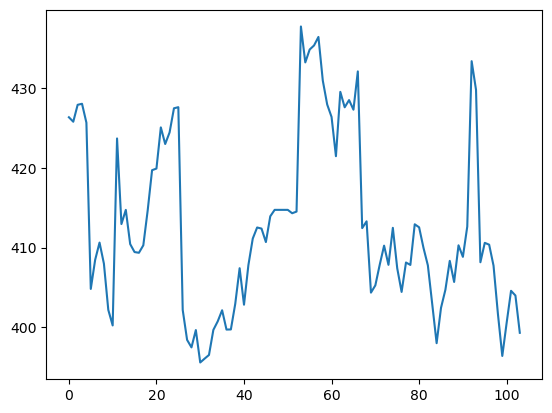

In [6]:
plt.plot(sales)

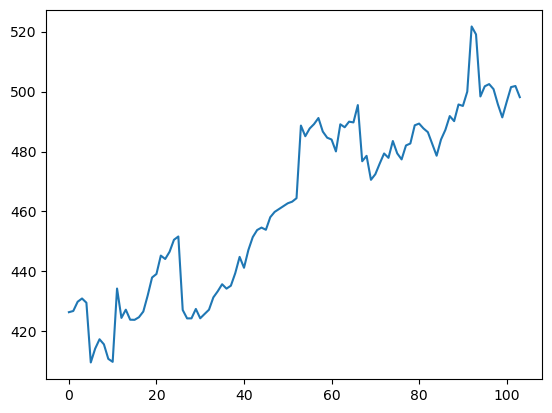

In [10]:
sales2=dg.add_trend(sales,0.25)
plt.plot(sales2)

In [41]:
x=np.array([3,2])
y=np.array([5,1])
beta=np.array([2,3])
#X=np.vstack([x,y])
X=np.column_stack([x,y])
print(X)
print(X.reshape(-1))
print("----------------------------")
print(np.prod(X, axis=0))
print("----------------------------")
print(np.prod(X, axis=1))
print("----------------------------")
print(X**[2,3])
print("----------------------------")
print(np.prod(X**beta,axis=1))
print("----------------------------")
print("----------------------------")

[[3 5]
 [2 1]]
[3 5 2 1]
----------------------------
[6 5]
----------------------------
[15  2]
----------------------------
[[  9 125]
 [  4   1]]
----------------------------
[1125    4]
----------------------------
----------------------------


1
2
27
3


array([28.,  0.,  0.])

In [9]:
(1+bud)**0.1*(1+z)**0.1

array([8.70771435, 8.70344891, 8.71641308, 8.70844369, 8.6964618 ,
       2.95233362, 2.95829416, 2.95682716, 2.94697933, 2.9425957 ,
       2.94602355, 8.70493089, 8.66411496, 8.69763861, 8.68277986,
       8.69041469, 8.69449139, 8.69890164, 8.71201296, 8.72414666,
       8.70517476, 8.72900211, 8.69628603, 8.71071499, 8.72164986,
       8.7087908 , 2.94620895, 2.94459063, 2.94720592, 2.95148161,
       2.94459664, 2.94868681, 2.94938627, 2.95357534, 2.95208118,
       2.95275586, 2.94686001, 2.94938035, 2.95499288, 2.95964562,
       2.94394105, 2.95869155, 2.95916893, 2.95595193, 2.95261517,
       2.94886478, 2.95884692, 2.9626961 , 2.96217257, 2.95934131,
       2.95349933, 2.94360975, 2.9498005 , 8.71668851, 8.68399126,
       8.71026462, 8.71346462, 8.71835657, 8.68600095, 8.6919874 ,
       8.69654967, 8.68402686, 8.7332921 , 8.6996902 , 8.71066304,
       8.70152767, 8.73232724, 2.95911145, 2.955086  , 2.93772324,
       2.94956386, 2.95442777, 2.95676927, 2.94748596, 2.96079